## Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import pickle
import csv
import missingno as msno
from IPython.display import display, HTML
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
# check the system font
import matplotlib.font_manager as font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# add the font wanted
font_dir = ['../Latin-Modern-Roman']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'Latin Modern Roman'
print(plt.rcParams['font.family'])


['Latin Modern Roman']


## Analyse sepsis and non-sepsis

In [30]:
neonates_sepsis = '../datasets/MIMICIII/neonates/original_sepsis/' 
sepsis_dir = os.listdir(neonates_sepsis)
neonates_non_sepsis = '../datasets/MIMICIII/neonates/original_non_sepsis/'
non_sepsis_dir = os.listdir(neonates_non_sepsis)

### Sepsis

In [31]:
sepsis_num = 0
positive_before_six = 0
info_overview = pd.DataFrame(columns=['subject_id','gender','los/hrs','losBeforeSepsis/hrs','startTime','endTime','timePoints','positiveAt'])
for csv_file in sepsis_dir:
  sepsis_num += 1

  info = pd.read_csv(neonates_sepsis+csv_file)

  subject_id = info.subject_id[0]
  gender = info.gender[0]
  time_points = len(info)
  start_time = info.time[0]
  end_time = info.time[time_points-1]
  positive_at = info.index[info['sepsis']][0]
  onset_time = info.time[positive_at]

  FMT = '%Y-%m-%d %H:%M:%S'
  los = ( datetime.strptime( end_time, FMT) - datetime.strptime(start_time, FMT) ).total_seconds()/3600
  los_before_sepsis = ( datetime.strptime(onset_time, FMT) - datetime.strptime(start_time, FMT) ).total_seconds()/3600

  new_row = {
      'subject_id':subject_id,
      'gender': gender,
      'los/hrs':los,
      'losBeforeSepsis/hrs':los_before_sepsis,
      'startTime':start_time,
      'endTime':end_time,
      'timePoints':time_points,
      'positiveAt': positive_at
  }
  info_overview = info_overview.append(new_row, ignore_index = True)

  if los_before_sepsis < 6: positive_before_six += 1




print('There are {} neonates with postive sepsis'.format(sepsis_num))
print('Among them {} stay fewer than 6 hours before the sepsis onset'.format(positive_before_six))
info_overview

There are 148 neonates with postive sepsis
Among them 30 stay fewer than 6 hours before the sepsis onset


,subject_id,gender,los/hrs,losBeforeSepsis/hrs,startTime,endTime,timePoints,positiveAt
0,15865,M,2034.000000,379.000000,2143-02-17 23:00:00,2143-05-13 17:00:00,2004,444
1,19534,M,2114.000000,650.000000,2190-07-26 08:00:00,2190-10-22 10:00:00,2217,708
2,9089,M,705.500000,463.500000,2120-10-17 05:30:00,2120-11-15 15:00:00,725,476
3,16772,M,1917.000000,348.333333,2161-03-13 16:00:00,2161-06-01 13:00:00,1970,379
4,8433,M,25.500000,1.000000,2121-03-21 18:00:00,2121-03-22 19:30:00,19,1
...,...,...,...,...,...,...,...,...
143,1341,M,833.333333,0.833333,2123-03-31 17:40:00,2123-05-05 11:00:00,788,2
144,9655,M,264.833333,1.000000,2192-05-10 14:10:00,2192-05-21 15:00:00,257,3
145,3146,M,791.000000,210.250000,2147-11-23 15:00:00,2147-12-26 14:00:00,810,227
146,11367,F,161.333333,160.166667,2115-01-04 17:40:00,2115-01-11 11:00:00,244,241


In [ ]:
gender_dis = info_overview.gender.value_counts()
print(gender_dis)
gender_dis.plot.pie(figsize=(5, 5))

In [ ]:
los_plot = info_overview['los/hrs'].plot.bar(figsize=(40,20))
los_plot.axhline(np.mean(info_overview['los/hrs']), color="orange")
los_plot.scatter(range(len(info_overview)),info_overview['losBeforeSepsis/hrs'], color="red", marker = 'x', s=150)
# los_plot.axhline(6, color="red")

### Non-sepsis

In [34]:
non_sepsis_num = 0
fewer_than_six_num = 0
info_overview_non = pd.DataFrame(columns=['subject_id','gender','los/hrs','startTime','endTime','timePoints','fewerThanSix'])
for csv_file in non_sepsis_dir:
  non_sepsis_num += 1

  info = pd.read_csv(neonates_non_sepsis+csv_file)

  subject_id = info.subject_id[0]
  gender = info.gender[0]
  time_points = len(info)
  start_time = info.time[0]
  end_time = info.time[time_points-1]

  FMT = '%Y-%m-%d %H:%M:%S'
  los = ( datetime.strptime( end_time, FMT) - datetime.strptime(start_time, FMT) ).total_seconds()/3600
  if los < 6: 
    fewerThanSix = True
    fewer_than_six_num += 1
  else:
    fewerThanSix = False


  new_row = {
      'subject_id':subject_id,
      'gender': gender,
      'los/hrs':los,
      'startTime':start_time,
      'endTime':end_time,
      'timePoints':time_points,
      'fewerThanSix': fewerThanSix
  }
  info_overview_non = info_overview_non.append(new_row, ignore_index = True)


In [ ]:
print('There are {} neonates with no sepsis'.format(non_sepsis_num))
print('There are {} neonates with fewer than 6 hours recordings'.format(fewer_than_six_num))
info_overview_non

M    1859
F    1472
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

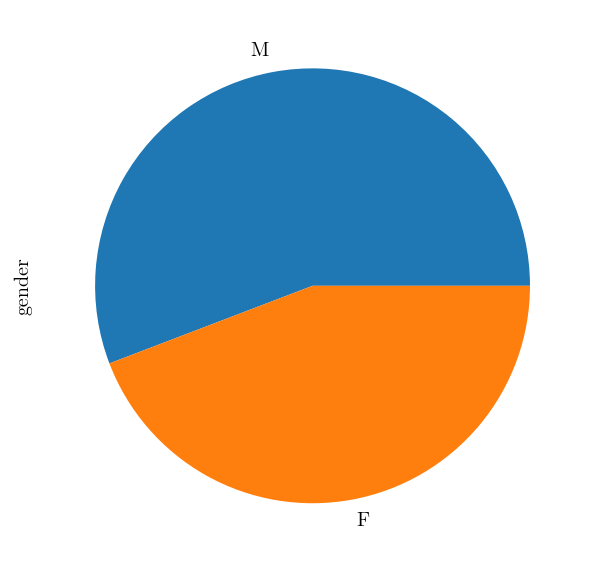

In [36]:
gender_dis_non = info_overview_non.gender.value_counts()
print(gender_dis_non)
gender_dis_non.plot.pie(figsize=(5, 5))

### Combined

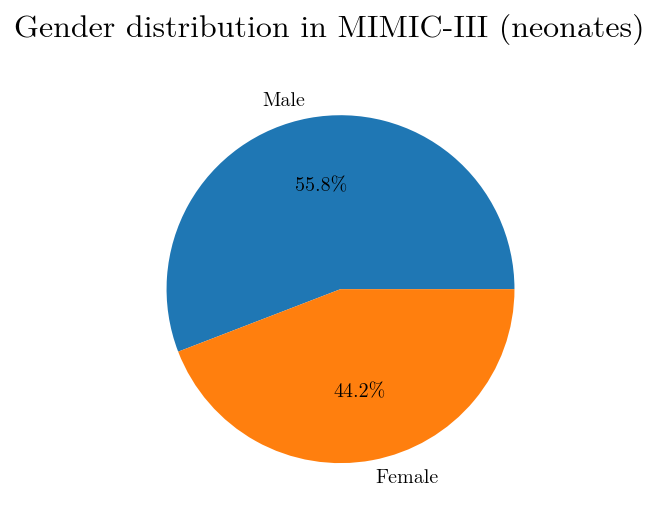

In [37]:
gender_dis_combined = gender_dis + gender_dis_non

#plot
fig, ax = plt.subplots()
fig.suptitle('Gender distribution in MIMIC-III (neonates)', size=16)
ax.pie(gender_dis_combined, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.savefig('./figs/gender_distribution_combined.pdf')

## Analyse distribution

In [39]:
with open('./data/data_all.pickle', 'rb') as f:
    data_all = pickle.load(f)
with open('./data/sepsis.pickle', 'rb') as f:
    data_sepsis = pickle.load(f)
with open('./data/non_sepsis.pickle', 'rb') as f:
    data_non_sepsis = pickle.load(f)

In [40]:
data_sepsis.columns

Index(['sepsis', 'subject_id', 'gender', 'SBP', 'DBP', 'MAP', 'Temp', 'HR',
       'RR', 'BaseExcess', 'FiO2', 'SaO2', 'PCO2', 'PH', 'Calcium', 'Sodium',
       'Potassium', 'Creatinine', 'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT',
       'Platelet', 'time'],
      dtype='object')

In [19]:
data_sepsis

,sepsis,subject_id,gender,SBP,DBP,MAP,Temp,HR,RR,BaseExcess,...,Sodium,Potassium,Creatinine,Chloride,Glucose,WBC,BUN,PTT,Platelet,time
0,False,10055,F,NaN,NaN,NaN,NaN,142.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2177-01-20 06:00:00
1,False,10055,F,NaN,NaN,NaN,NaN,145.0,43.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2177-01-20 07:00:00
2,False,10055,F,NaN,NaN,NaN,NaN,146.0,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2177-01-20 08:00:00
3,False,10055,F,NaN,NaN,NaN,97.900002,132.0,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2177-01-20 09:00:00
4,False,10055,F,NaN,NaN,NaN,NaN,134.0,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2177-01-20 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,9911,M,47.0,25.0,33.0,NaN,132.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129-08-20 12:00:00
97,False,9911,M,NaN,NaN,NaN,NaN,145.0,NaN,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129-08-20 13:00:00
98,False,9911,M,NaN,NaN,NaN,99.500000,152.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129-08-20 14:00:00
99,False,9911,M,NaN,NaN,NaN,NaN,152.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,180.0,2129-08-20 15:00:00


In [20]:
# lab test features 
labs=['BaseExcess', 'FiO2', 'PCO2', 'PH', 'Calcium', 'Sodium',
       'Potassium', 'Creatinine', 'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT',
       'Platelet']

# vital signal features
vitals = ['HR','SaO2','Temp','SBP','MAP','DBP','RR']

# demographic features
demogs = ['gender']

# label
labels = ['sepsis']

# numerical value features
num_features = [ 'HR','SaO2','Temp','SBP','MAP','DBP','RR', 'BaseExcess', 'FiO2', 
                'PCO2', 'PH', 'Calcium', 'Sodium','Potassium', 'Creatinine', 
                'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT', 'Platelet']

In [21]:
def feature_distribution(data_frame,feature_name):
  df = data_frame
  feature = df[feature_name]
  feature_min = feature.min()
  feature_max = feature.max()
  feature_mean = feature.mean()
  feature_std = feature.std()
  missing_rate = feature.isnull().sum() / len(feature)
  return feature_min, feature_max, feature_mean, feature_std, missing_rate

### Sepsis

In [ ]:
df_feature_sepsis = pd.DataFrame(columns=['Feature','Min','Max','Mean','STD','MissingRate'])
for feature in num_features:
  feature_min, feature_max, feature_mean, feature_std, missing_rate = feature_distribution(data_sepsis,feature)
  df_feature_sepsis = df_feature_sepsis.append({'Feature':feature,'Min':feature_min,'Max':feature_max,'Mean':feature_mean,'STD':feature_std,'MissingRate':missing_rate}, ignore_index = True)

df_feature_sepsis

In [23]:
df_feature_sepsis.to_pickle("../datasets/MIMICIII/neonates/sepsis_feature_dis.pickle")

In [24]:
labs_df = data_sepsis[labs]
vitals_df = data_sepsis[vitals]
demogs_df = data_sepsis[demogs]
print('Missing Rate of Lab Features:',np.mean((labs_df.isnull().sum() / labs_df.shape[0])) )
print('Missing Rate of Vital Sign Features:',np.mean((vitals_df.isnull().sum() / vitals_df.shape[0])) )
print('Missing Rate of Demographics Features:',np.mean((demogs_df.isnull().sum() / demogs_df.shape[0])) )

Missing Rate of Lab Features: 0.9468559272672019
Missing Rate of Vital Sign Features: 0.5125864208473675
Missing Rate of Demographics Features: 0.0


Dense Display

*The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.*

In [ ]:
msno.matrix(labs_df)

In [ ]:
msno.matrix(vitals_df)

In [ ]:
msno.matrix(demogs_df)

In [ ]:
#pick out the columns that contain null data
missingdata_df = data_sepsis.columns[data_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))
msno.bar(data_sepsis[missingdata_df], color="blue", log=False, figsize=(30,18))

In [ ]:
msno.heatmap(data_sepsis[missingdata_df], figsize=(20,20))

### Non-Sepsis

In [25]:
labs_df = data_non_sepsis[labs]
vitals_df = data_non_sepsis[vitals]
demogs_df = data_non_sepsis[demogs]
print('Missing Rate of Lab Features:',np.mean((labs_df.isnull().sum() / labs_df.shape[0])) )
print('Missing Rate of Vital Sign Features:',np.mean((vitals_df.isnull().sum() / vitals_df.shape[0])) )
print('Missing Rate of Demographics Features:',np.mean((demogs_df.isnull().sum() / demogs_df.shape[0])) )

Missing Rate of Lab Features: 0.9680085522018269
Missing Rate of Vital Sign Features: 0.5393633890152146
Missing Rate of Demographics Features: 0.0


In [ ]:
df_feature_non_sepsis = pd.DataFrame(columns=['Feature','Min','Max','Mean','STD','MissingRate'])
for feature in num_features:
  feature_min, feature_max, feature_mean, feature_std, missing_rate = feature_distribution(data_non_sepsis,feature)
  df_feature_non_sepsis = df_feature_non_sepsis.append({'Feature':feature,'Min':feature_min,'Max':feature_max,'Mean':feature_mean,'STD':feature_std,'MissingRate':missing_rate}, ignore_index = True)

df_feature_non_sepsis

In [ ]:
msno.matrix(labs_df)

In [ ]:
msno.matrix(vitals_df)

In [ ]:
msno.matrix(demogs_df)

In [ ]:
#pick out the columns that contain null data
missingdata_df = data_non_sepsis.columns[data_non_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))
msno.bar(data_non_sepsis[missingdata_df], color="blue", log=False, figsize=(30,18))

In [ ]:
msno.heatmap(data_non_sepsis[missingdata_df], figsize=(20,20))

### Combined

In [41]:
data_all.columns

Index(['sepsis', 'subject_id', 'gender', 'SBP', 'DBP', 'MAP', 'Temp', 'HR',
       'RR', 'BaseExcess', 'FiO2', 'SaO2', 'PCO2', 'PH', 'Calcium', 'Sodium',
       'Potassium', 'Creatinine', 'Chloride', 'Glucose', 'WBC', 'BUN', 'PTT',
       'Platelet', 'time'],
      dtype='object')

Number of featurs that contains null values 21


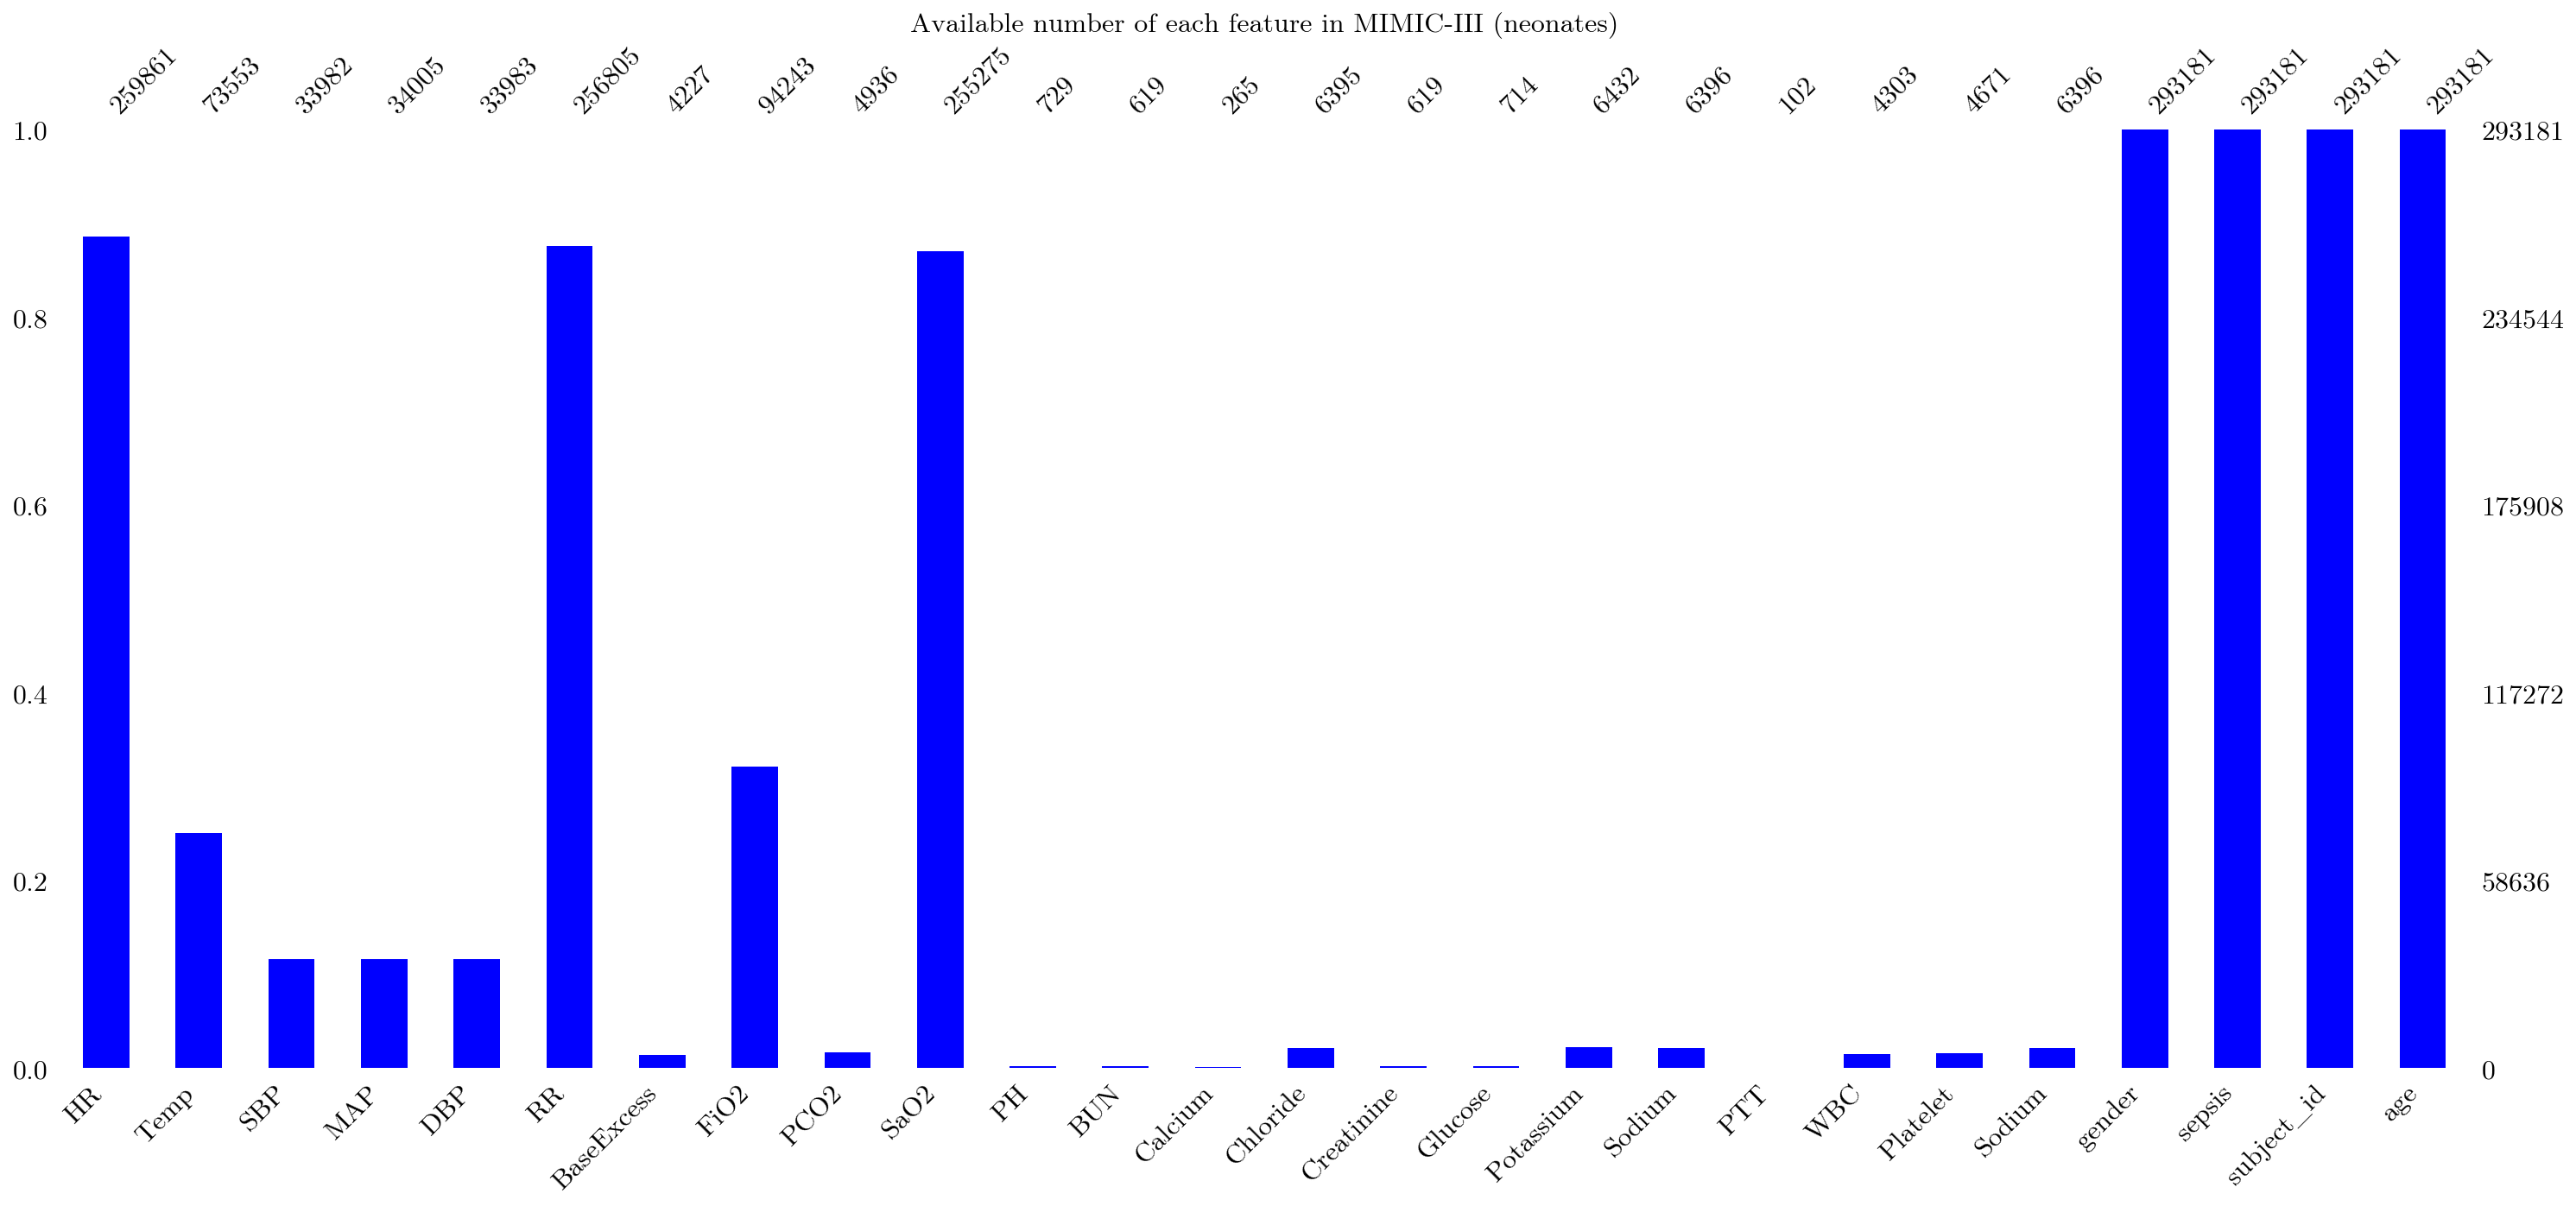

In [42]:
#pick out the columns that contain null data
missingdata_df = data_sepsis.columns[data_sepsis.isnull().any()].tolist()
print('Number of featurs that contains null values',len(missingdata_df))

#re-arrange the order of columns
#       
data_all = data_all[['HR', 'Temp', 'SBP', 'MAP', 'DBP', 'RR', 
                            'BaseExcess', 'FiO2', 'PCO2', 'SaO2', 'PH', 'BUN', 
                            'Calcium', 'Chloride', 'Creatinine', 'Glucose', 
                            'Potassium', 'Sodium', 'PTT',
                            'WBC', 'Platelet', 'Sodium', 
                            'gender','sepsis', 'subject_id']]
data_all['age'] = 0

plt.figure(figsize=(20,10))
msno.bar(data_all, color="blue", log=False)
plt.title('Available number of each feature in MIMIC-III (neonates)', size=16)
plt.show()